100%|██████████| 1000/1000 [03:23<00:00,  4.68it/s]


203.498283148


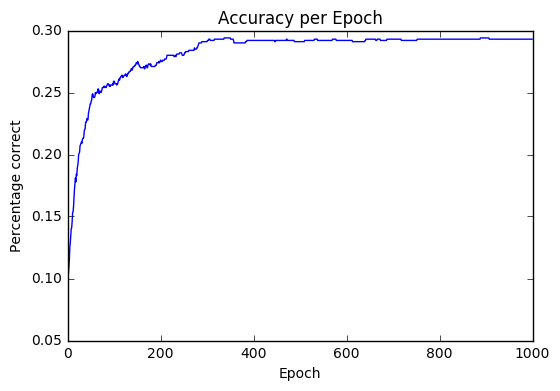

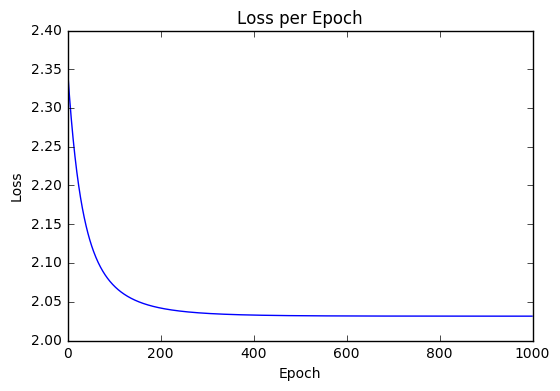

In [1]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
import time
from tqdm import tqdm


NUM_EPOCHS = 1000
# =============================================
#
# load cifar-10-small and project down
#

def unpickle( file ):
    import cPickle
    fo = open(file, 'rb')
    dict = cPickle.load(fo)
    fo.close()
    return dict
 
data = unpickle( './cifar-10-batches-py/data_batch_1' )
 
features = data['data']
labels = data['labels']
labels = np.atleast_2d( labels ).T
 
N = 1000
D = 10
 
# only keep N items
features = features[ 0:N, : ] 
labels = labels[ 0:N, : ]
 
# project down into a D-dimensional space
features = np.dot( features, np.random.randn( 3072, D) )
 
# whiten our data - zero mean and unit standard deviation
features = (features - np.mean(features, axis=0)) / np.std(features, axis=0)

W = np.random.randn(10,10)/10

def scores(W):
    return np.dot(W,features.T)

def loss_function(W):
    score = scores(W)
    loss = np.exp(score-np.max(score, axis=0)) / np.sum(np.exp(score - np.max(score, axis=0)),axis = 0)
    loss = -np.log(loss)
    loss = [i[labels[ind]] for ind, i in enumerate(loss.T)]
    loss_val = np.mean(loss)
    return loss_val


def get_accuracy(W):
    score = scores(W)
    guess = np.argmax(score,axis=0)
    acc = float(sum(np.atleast_2d(guess).T == labels))/labels.shape[0]
    return acc


def numerical_gradient(loss_function, W):
    grad = np.zeros((W.shape[0], W.shape[1]))
    loss_val = loss_function(W)
    accuracy = get_accuracy(W)
    
    delta = 0.000001
    for row in xrange(W.shape[0]):
        for column in xrange(W.shape[1]):
            original_weight = W[row][column]
            W[row][column] = W[row][column] + delta
            
            lossForChange = loss_function(W)
            grad[row, column] = (lossForChange - loss_val) / delta
            
            
            W[row][column] = original_weight
            
    return loss_val, grad, accuracy

    
if __name__ == "__main__":
    start = time.time()
    step_size = 0.1
    accuracy = np.zeros((NUM_EPOCHS,1))
    loss_values = np.zeros((NUM_EPOCHS,1))
    for i in tqdm(xrange(0,NUM_EPOCHS)):
        loss_function_value, grad, accur = numerical_gradient( loss_function, W )
        W = W - step_size * grad
        accuracy[i] = accur
        loss_values[i] = loss_function_value
        
    x = np.arange(NUM_EPOCHS)
    print (time.time() - start)
    
plt.plot(x, accuracy)
plt.title("Accuracy per Epoch")
plt.xlabel("Epoch")
plt.ylabel("Percentage correct")
plt.show()

plt.plot(x, loss_values)
plt.title("Loss per Epoch")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()